# Image Compression with SVD

SVD decomposition is a powerful tool for data compression. This example showcases the use of SVD decomposition for a simple image compression.

The SVD decomposition of the matrix $X$ is defined as : $X=U\Sigma V^{T}$.

## Load Data

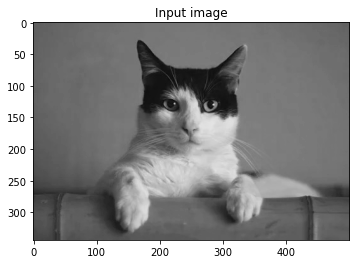

X shape : (344, 500)


In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets

# Load and prepare the image (X)
filepath = './resources/cat.jpg'
A = mpimg.imread(filepath)
X = np.mean(A, 2) # from RGB to grayscale

# Show the grayscale image and image shape
img = plt.imshow(X)
img.set_cmap('gray')
plt.title('Input image')
plt.show()
print('X shape :', X.shape)

## SVD decomposition

Compute the decomposition : $X=U\Sigma V^{T}$


In [2]:
U, singular_values, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(singular_values)

print('U shape :', U.shape)
print('Sigma shape :', S.shape)
print('VT shape :', VT.shape)

U shape : (344, 344)
Sigma shape : (344, 344)
VT shape : (344, 500)


##  Compress

Rebuild with an approximated $X \approx U_{r}\Sigma_{r} {V_{r}}^{T} $.

The singular values are sorted by Numpy and we can use the first columns $\Sigma$ to extract the most relevant informations.


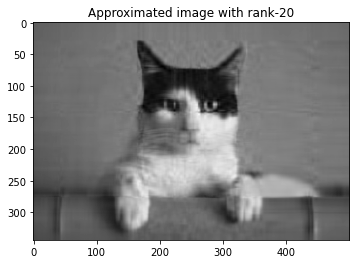

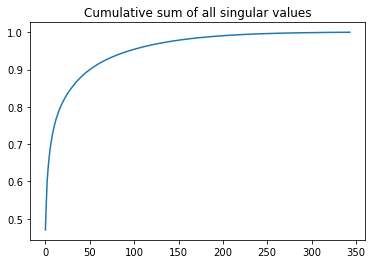

Ur shape : (344, 20)
Sr shape : (20, 20)
Vtr shape : (20, 500)
approximatedX shape : (344, 500)


In [5]:
r = 20

# Compute approximated image
Ur = U[:,:r]
Sr = S[:r,:r]
VTr = VT[:r,:]
approximatedX = Ur @ Sr @ VTr

# Show approximated image, cumulative singular values and shapes
img = plt.imshow(approximatedX)
img.set_cmap('gray')
plt.title('Approximated image with rank-{}'.format(r))
plt.show()

cumulative_sv = np.cumsum(singular_values) / np.sum(singular_values)
plt.plot(cumulative_sv)
plt.title('Cumulative sum of all singular values')
plt.show()

print('Ur shape :', Ur.shape)
print('Sr shape :', Sr.shape)
print('Vtr shape :', VTr.shape)
print('approximatedX shape :', approximatedX.shape) # equal to X.shape